In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##loading files 

CHARACTER_MD = "MovieSummaries/character.metadata.tsv"
character_md = pd.read_csv(CHARACTER_MD, sep="\t", header=None, names = ['Wikipedia movie ID', 
                                                                         'Freebase movie ID', 
                                                                         'Movie release date', 
                                                                         'Character name', 
                                                                         'Actor date of birth', 
                                                                         'Actor gender',
                                                                         'Actor height (in meters)',
                                                                         'Actor ethnicity (Freebase ID)',
                                                                         'Actor name', 
                                                                         'Actor age at movie release', 
                                                                         'Freebase character/actor map ID', 
                                                                         'Freebase character ID', 
                                                                         'Freebase actor ID'])
#character_md.head(10)

MOVIE_MD = "MovieSummaries/movie.metadata.tsv"
movie_md = pd.read_csv(MOVIE_MD, sep="\t", header=None, names = ['Wikipedia movie ID',
                                                                 'Freebase movie ID',
                                                                 'Movie name',
                                                                 'Movie release date',
                                                                 'Movie box office revenue',
                                                                 'Movie runtime',
                                                                 'Movie languages', 
                                                                 'Movie countries', 
                                                                 'Movie genres'])
#movie_md.head(10)

NAME_CLUSTERS = 'MovieSummaries/name.clusters.txt'
name_clusters = pd.read_csv(NAME_CLUSTERS, sep="\t", header=None, names = ['character name', 
                                                                           'ID in character_metadata'])
#name_clusters.head()

PLOT_SUMMARIES = 'MovieSummaries/plot_summaries.txt'
plot_summaries = pd.read_csv(PLOT_SUMMARIES, sep="\t", header=None, names = ['Wikipedia movie ID', 
                                                                           'summary'])
#plot_summaries.head()

TVTROPES_CLUSTERS = 'MovieSummaries/tvtropes.clusters.txt'
tvtropes_clusters = pd.read_csv(TVTROPES_CLUSTERS, sep="\t", header=None, names = ['char types', 'char', 'movie', 'ID'])
tvtropes_clusters.head(3)

,char types,char,movie,ID
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":...",NaN,NaN
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi...",NaN,NaN
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S...",NaN,NaN
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!...",NaN,NaN
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""...",NaN,NaN


In [4]:
character_md.head(3)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
movie_md.head(3)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
name_clusters.head(3)

,character name,ID in character_metadata
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [7]:
plot_summaries.head(3)

,Wikipedia movie ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


## Actor's median age by genre

In [16]:
## actor's age at movie release, by gender
character_md[['Actor gender', 'Actor age at movie release']].groupby('Actor gender').median('Actor age at movie release')

,Actor age at movie release
Actor gender,
F,30.0
M,39.0


## actor's histogram of genre repartition

<AxesSubplot:xlabel='Actor gender', ylabel='Count'>

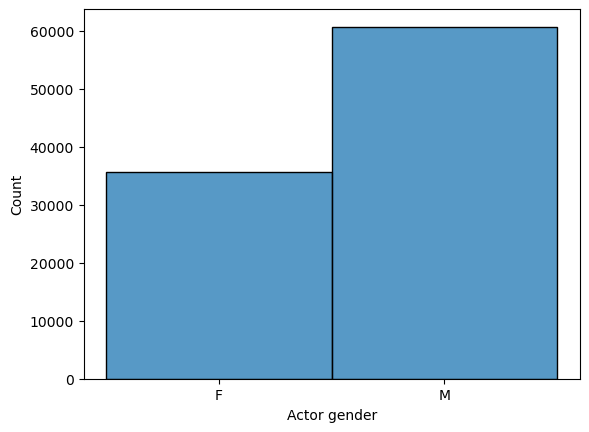

In [13]:
## histogram of the distribution of number of actor's for each gender
sns.histplot(character_md.drop_duplicates('Actor name')['Actor gender'])

## Actor's movies box office, by genre

In [18]:
#merge characters to movies data
complete_merge = character_md.merge(movie_md,how = 'inner', on = 'Wikipedia movie ID')
complete_merge.shape


(450669, 21)

In [41]:
merge_mean_boxoffice = complete_merge.groupby(['Actor name','Actor gender'], as_index=False).mean('Movie box office revenue')

In [98]:
merge_mean_boxoffice.head(3)

,Actor name,Actor gender,Wikipedia movie ID,Actor height (in meters),Actor age at movie release,Movie box office revenue,Movie runtime
12,40 Glocc,M,2.102925e+07,NaN,29.000000,4.591629e+06,90.000000
13,50 Cent,M,2.085913e+07,1.829,33.047619,3.100365e+07,94.294118
14,A Martinez,M,1.609897e+07,NaN,51.500000,8.500538e+06,94.800000


In [43]:
merge_mean_boxoffice = merge_mean_boxoffice.dropna(subset=['Movie box office revenue'])

In [44]:
M_df = merge_mean_boxoffice[merge_mean_boxoffice['Actor gender'] == 'M'][['Actor name', 'Movie box office revenue']]
F_df = merge_mean_boxoffice[merge_mean_boxoffice['Actor gender'] == 'F'][['Actor name', 'Movie box office revenue']]

Text(0.5, 1.0, 'histogram of box office revenues by gender')

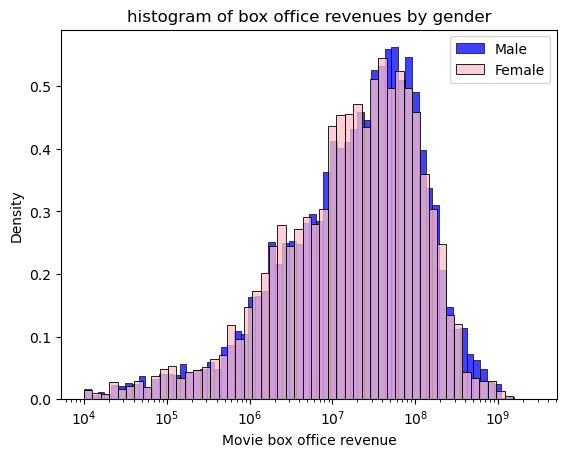

In [116]:
## these density histograms seems really closes
sns.histplot(M_df['Movie box office revenue'], stat='density', color = 'blue', log_scale=True, label = 'Male')
sns.histplot(F_df['Movie box office revenue'], stat='density', color = 'pink', log_scale=True, label = 'Female')
plt.legend()
plt.title('histogram of box office revenues by gender')

In [54]:
## seeing movie box office revenue for each genre
M_df['Movie box office revenue'].describe()

count    1.992000e+04
mean     6.201519e+07
std      1.126309e+08
min      1.000000e+04
25%      5.290010e+06
50%      2.388164e+07
75%      7.175011e+07
max      2.782275e+09
Name: Movie box office revenue, dtype: float64

In [55]:
F_df['Movie box office revenue'].describe()

count    1.142600e+04
mean     5.637313e+07
std      1.030715e+08
min      1.000000e+04
25%      4.762640e+06
50%      2.095651e+07
75%      6.680972e+07
max      1.511758e+09
Name: Movie box office revenue, dtype: float64

It seems that males playe in general in movies for which the box office is higher

## We check if frequency is the same for each sex 
###  frequency = mean number of movies played per year

In [73]:
## number of movies played every year, for actors who have more than 5 movies in their carrer
frequency_movies = complete_merge.groupby(['Actor name', 'Actor gender'], as_index = False).count()

In [74]:
frequency_movies = frequency_movies[['Actor name', 'Actor gender']].copy()

In [75]:
frequency_movies['number of movies'] = complete_merge.groupby(['Actor name', 'Actor gender'], as_index = False).count()['Wikipedia movie ID']

In [76]:
frequency_movies.sort_values('number of movies', ascending =False)
frequency_movies = frequency_movies[frequency_movies['number of movies'] > 2]

In [77]:
frequency_movies['age last movie'] = complete_merge.groupby(['Actor name', 'Actor gender'], as_index = False).max('Actor age at movie release')['Actor age at movie release']
frequency_movies['age first movie'] = complete_merge.groupby(['Actor name', 'Actor gender'], as_index = False).min('Actor age at movie release')['Actor age at movie release']

In [80]:
frequency_movies = frequency_movies.dropna(subset=['age last movie', 'age first movie'])

In [81]:
frequency_movies.head(3)

,Actor name,Actor gender,number of movies,age last movie,age first movie
13,50 Cent,M,23,36.0,27.0
14,A Martinez,M,11,62.0,34.0
30,A. J. Benza,M,3,44.0,37.0


In [83]:
frequency_movies['frequency'] = frequency_movies['number of movies']/(frequency_movies['age last movie']-frequency_movies['age first movie']+1)

/var/folders/ml/_g1gzlvn3dx4lm6xz6kbjghm0000gn/T/ipykernel_26817/389989873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_movies['frequency'] = frequency_movies['number of movies']/(frequency_movies['age last movie']-frequency_movies['age first movie']+1)


In [85]:
frequency_movies.sample(5)

,Actor name,Actor gender,number of movies,age last movie,age first movie,frequency
21614,Derrick De Marney,M,14,60.0,24.0,0.378378
65499,"Morton Downey, Jr.",M,3,59.0,57.0,1.000000
42673,Jim Piddock,M,14,56.0,41.0,0.875000
13769,Cassie Scerbo,F,4,21.0,17.0,0.800000
78880,Roy Black,M,3,31.0,29.0,1.000000


In [87]:
fm_M = frequency_movies[frequency_movies['Actor gender']=='M']
fm_F = frequency_movies[frequency_movies['Actor gender']=='F']

frequency informations for Male gender :
count    15320.000000
mean         0.716306
std          0.726378
min          0.036145
25%          0.307692
50%          0.526316
75%          0.892857
max         21.000000
Name: frequency, dtype: float64

frequency informations for Female gender :
count    9204.000000
mean        0.759223
std         0.632021
min         0.041667
25%         0.333333
50%         0.600000
75%         1.000000
max         8.000000
Name: frequency, dtype: float64


Text(0.5, 1.0, 'histogram of number of movies played per year by gender')

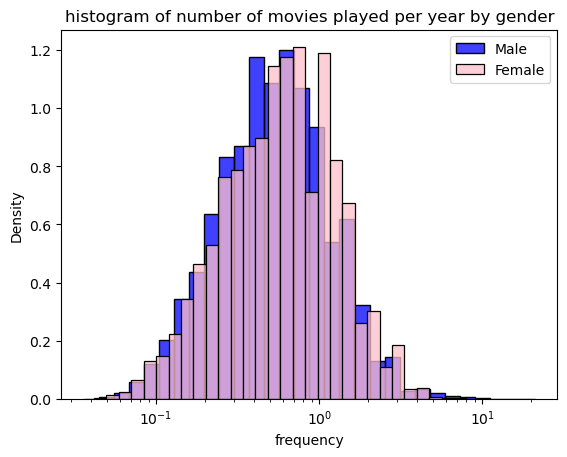

In [108]:
sns.histplot(fm_M['frequency'], bins=30, stat='density', color = 'blue', log_scale=True, label='Male')
sns.histplot(fm_F['frequency'], bins=30, stat='density', color = 'pink', log_scale=True, label='Female')
plt.legend()
print('frequency informations for Male gender :')
print(fm_M['frequency'].describe(), end = '\n\n')
print('frequency informations for Female gender :')
print(fm_F['frequency'].describe())

plt.title('histogram of number of movies played per year by gender')

interesting discovery : it seems that women in general, has a slightly higher frequency of movie played.
We could test that with a t_test to check solidity of this assumption

what could be analyzed later :
- diversity of personas types
- diversity of personas 
- diversity of descriptions
- most redundant descriptions
- list of bad/good descriptions